#Credit Scoring: Predict the probability of going default 
    Algorithm: Logistic Regression (10 features with 1 target)

    Data: https://www.kaggle.com/c/GiveMeSomeCredit
    
    By: Hee Kyung, Yoon

In [1]:
%matplotlib inline 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 0. LOAD DATA
    1. load data
    2. check data

## 1. PROCESS DATA (-> X, y)
    1. split data into training, cross validation and test data sets
    2. splitData to X & y
    3. featureScale


## 2. BUILD FIRST MODEL
    1. Train   
    2. Predict

## 3. EVALUATE MODEL
    Learning Curve
    
## 4. MODIFY MODEL
    1. Add polynomial features
    2. Modify C (regularization term)
    3. Modify Threshold
    4. Modified Model

----------------------------------------------------------------------------------------------------------------------------------------------------

# 0. LOAD DATA
    1. load data
    2. check data

In [2]:
def load(filename):
    '''
    filenname: string ('test.csv')
    
    returns: DataFrame
    '''
    data = pd.DataFrame.from_csv(filename, encoding = 'utf-8')
    print '\nData Columns:'
    for i in range(len(data.columns)):
        print '\t',i,'\t', data.columns[i]

    check(data)
    
    return data

def check(X):
    '''
    X: DataFrame or Series
    
        prints shape and head
    
    returns: None
    '''
    print '\nShape is:\n', X.shape
    print X.head()

data = load('training_balanced.csv')


Data Columns:
	0 	SeriousDlqin2yrs
	1 	RevolvingUtilizationOfUnsecuredLines
	2 	age
	3 	NumberOfTime30.59DaysPastDueNotWorse
	4 	DebtRatio
	5 	MonthlyIncome
	6 	NumberOfOpenCreditLinesAndLoans
	7 	NumberOfTimes90DaysLate
	8 	NumberRealEstateLoansOrLines
	9 	NumberOfTime60.89DaysPastDueNotWorse
	10 	NumberOfDependents

Shape is:
(11942, 11)
        SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
X                                                                     
142005                 0                              0.003154   71   
75837                  0                              0.245192   53   
42654                  0                              0.563109   72   
23652                  0                              0.090164   57   
63553                  0                              0.091636   72   

        NumberOfTime30.59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
X                                                                        
142005     

#1. PROCESS DATA (-> X, y)
    1. split data into Training, Cross validation & Test sets
    2. splitData to X & y
    3. featureScale

In [7]:
# 1. Split data into training data, cross validation data, and test data

import random

'''
# Shuffle index
index = np.array(data.index)
random.shuffle(index)

print index.shape
print index

# training set (60%)
trainingSize = data.shape[0] * 0.60
training = data.ix[index[:trainingSize]]

training.to_csv('training.csv', encoding='utf-8')

print '\n', training.shape
print training.head()

# crossValidation set (20%)
crossValSize = data.shape[0] * 0.20
crossValidation = data.ix[index[trainingSize:trainingSize + crossValSize]]

crossValidation.to_csv('crossValidation.csv', encoding='utf-8')

print '\n', crossValidation.shape

# test set (20%)
test = data.ix[index[trainingSize + crossValSize:]]

test.to_csv('test.csv', encoding = 'utf-8')

print '\n', crossValidation.shape
'''

"\n# Shuffle index\nindex = np.array(data.index)\nrandom.shuffle(index)\n\nprint index.shape\nprint index\n\n# training set (60%)\ntrainingSize = data.shape[0] * 0.60\ntraining = data.ix[index[:trainingSize]]\n\ntraining.to_csv('training.csv', encoding='utf-8')\n\nprint '\n', training.shape\nprint training.head()\n\n# crossValidation set (20%)\ncrossValSize = data.shape[0] * 0.20\ncrossValidation = data.ix[index[trainingSize:trainingSize + crossValSize]]\n\ncrossValidation.to_csv('crossValidation.csv', encoding='utf-8')\n\nprint '\n', crossValidation.shape\n\n# test set (20%)\ntest = data.ix[index[trainingSize + crossValSize:]]\n\ntest.to_csv('test.csv', encoding = 'utf-8')\n\nprint '\n', crossValidation.shape\n"

In [6]:
# load split data

training = load('training_balanced.csv')
cv = load('crossValidation_balanced.csv')
test = load('test.csv')


Data Columns:
	0 	SeriousDlqin2yrs
	1 	RevolvingUtilizationOfUnsecuredLines
	2 	age
	3 	NumberOfTime30.59DaysPastDueNotWorse
	4 	DebtRatio
	5 	MonthlyIncome
	6 	NumberOfOpenCreditLinesAndLoans
	7 	NumberOfTimes90DaysLate
	8 	NumberRealEstateLoansOrLines
	9 	NumberOfTime60.89DaysPastDueNotWorse
	10 	NumberOfDependents

Shape is:
(11942, 11)
        SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
X                                                                     
142005                 0                              0.003154   71   
75837                  0                              0.245192   53   
42654                  0                              0.563109   72   
23652                  0                              0.090164   57   
63553                  0                              0.091636   72   

        NumberOfTime30.59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
X                                                                        
142005     

In [7]:
# 2. splitData to X & y

def splitData(Xandy):
    '''
    Xandy:
    
    returns: X, y
    '''
    X = Xandy.iloc[:, 1:]
    #check(Xtrain)

    y = Xandy['SeriousDlqin2yrs']
    #check(ytrain)
    
    # fill nan with 0
    X = X.fillna(0)
    y = y.fillna(0)
    return X, y



# 3. feature scaling X
def featureScale(X):
    '''
    X: DataFrame
    
    returns: DataFrame (feature scaled)
    '''
    for col in range(X.shape[1]):
        #print 'col index:', col
        copied = X.iloc[:, col]
        #print 'head\n', copied.head()
        #print 'mean: ', copied.mean()
        #print 'std: ', copied.std()
        X.iloc[:, col] = (copied - copied.mean())/copied.std()
    return X

In [8]:
Xtrain, ytrain = splitData(training)
Xtrain = featureScale(Xtrain)
check(Xtrain)

Xcv, ycv = splitData(cv)
Xcv = featureScale(Xcv)

Xtest, ytest = splitData(test)
Xtest = featureScale(Xtest)


Shape is:
(11942, 10)
        RevolvingUtilizationOfUnsecuredLines       age  \
X                                                        
142005                             -0.026091  1.524683   
75837                              -0.024945  0.262825   
42654                              -0.023440  1.594786   
23652                              -0.025679  0.543238   
63553                              -0.025672  1.594786   

        NumberOfTime30.59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
X                                                                        
142005                             -0.155368  -0.253035      -0.266262   
75837                              -0.155368  -0.253088       0.292286   
42654                              -0.155368  -0.252378       0.172051   
23652                              -0.155368  -0.253124       1.174615   
63553                              -0.155368  -0.252608      -0.632523   

        NumberOfOpenCreditLinesAndLoans  NumberOfTi

# 2. BUILD FIRST MODEL
    1. Train
        method 1) Manually Implemented
        method 2) LogisticRegression module -> We'll stick to this onward!
    2. Predict

In [9]:
# 1. Train
    # method 1) Manually Implemented

from scipy.optimize import fmin_cg

# Add Bias terms to Xtrain
def addBias(X):
    '''
    X: DataFrame (m * n)
    
        Adds bias terms to the first column
    
    returns: DataFrame (m * (n + 1))
    '''
    X.insert(0, 'Bias', 1)
    return X



# logisticRegression
L = 0.1

def logisticRegression(costfunction, gradFunction, X, y, L):
    '''
    constFunction: function
    X: matrix
    y: vector
    L (lambda): float
    
    returns: vector (theta)
    '''
    initial_theta = np.zeros(n+1)
    args = (X, y, L)
    theta = fmin_cg(f = costFunction, x0 = initial_theta, \
                    fprime = gradFunction, args = args)
    return theta

# costFunction
def costFunction(theta, *args):
    '''
    theta: vector
    X: matrix
    y: vector
    L (lambda): float
    
    returns: float (J)
    '''
    #J = sum(np.multiply(np.log(sigmoid(X.dot(theta))), -y) - \
    #       np.multiply((1 - y),log(1 - sigmoid(X.dot(theta)))))/m 
    theta = theta.reshape((n+1, 1))
    
    X, y, L = args
    y = pd.DataFrame(y)
    y = y.rename(columns = {'SeriousDlqin2yrs':0})
    
    J = np.log(sigmoid(X.dot(theta))).T.dot(-y)
    #print '1',J
    J = J - pd.DataFrame(1 - y).T.dot(np.log(1 - sigmoid(X.dot(theta))))
    #print '2', J
    J = np.sum(J)/m
    #print '3', J
    J = J + (L/(2.0*m)) * np.sum(theta[1:]**2)
    #print '4',J
    
    return np.array(J)

# gradFunction
def gradFunction(theta, *args):
    # grad = transpose(sigmoid(X * y)) * y + lambda * sum(theta[1:])/m
    theta = theta.reshape((n+1, 1))
    
    X, y, L = args
    y = pd.DataFrame(y)
    y = y.rename(columns = {'SeriousDlqin2yrs':0})
    
    grad = X.T.dot(sigmoid(X.dot(theta)) - pd.DataFrame(y))/m
    #print grad.shape
    
    # Regularize
    theta = (L/m)*theta
    theta[0] = 0
    #print theta.shape
    #print theta
    
    grad = np.array(grad + theta)
    grad = grad.reshape(n+1)
    
    return grad

# sigmoid
def sigmoid(z):
    '''
    x: float
    
    returns: float
    '''
    return 1.0/(1.0 + np.exp(-z))


In [10]:
# 1. Train
    # method 2) LogisticRegression Module

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(Xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [51]:
# 2. Predict

from sklearn.metrics import precision_recall_fscore_support

def predict(clf, X, y, threshold = 0.5):
    '''
    clf
    X
    y
    threshold
    
        prints measures (accuracy, precision, recall, F-score)
    
    returns: prediction(vector) 
            
    '''
    # get prediction
    prediction = getPrediction(clf, X, threshold)
    
    # get measures
    measures = getMeasures(y, prediction)
    accuracy, precision, recall, fscore = measures
    
    print '\naccuracy', accuracy
    print 'precision', precision
    print 'recall', recall
    print 'fscore', fscore
    
    return prediction

def getPrediction(clf, X, threshold = 0.5):
    '''
    clf: LogisticRegression()
    X
    threshold
    
    return: prediction (label vector)
    '''
    #proba = clf.predict_proba(X)[:,1]
    print clf.classes_
    proba_all = clf.predict_proba(X)
    plt.figure()
    plt.hist(proba_all[:,0])
    plt.figure()
    plt.hist(proba_all[:,1])
    print proba_all
    
    
    return (proba_all[:, 1] > threshold) * 1

def getMeasures(y, prediction):
    '''
    
    returns: measures
    '''
    accuracy = (prediction == y).mean()
    
    precision, recall, f_score, support = \
        precision_recall_fscore_support(y, prediction, average = 'binary')
    
    measures = (accuracy, precision, recall, f_score)
    return measures

[0 1]
[[ 0.28240603  0.71759397]
 [ 0.62460798  0.37539202]
 [ 0.52694013  0.47305987]
 ..., 
 [ 0.31166906  0.68833094]
 [ 0.39479558  0.60520442]
 [ 0.60791572  0.39208428]]

accuracy 0.512766666667
precision 0.0998794339742
recall 0.784646061815
fscore 0.177202364199

[1 0 0 ..., 1 1 0]


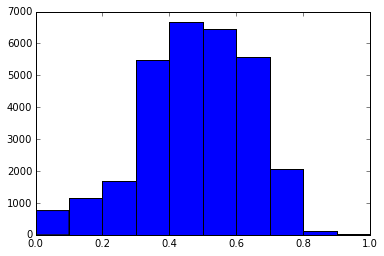

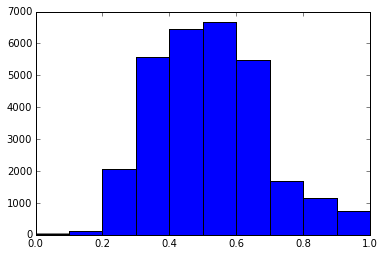

In [52]:
prediction = predict(clf, Xtest, ytest)
print '\n', prediction

#3. Evaluate Model
    Learning Curve

In [13]:
def learningCurve(listOfNum, Xtrain, ytrain, Xcv, ycv, C = 1):
    '''
        prints learning curve
    returns: None
    '''
    accuracyTList = []
    accuracyCvList = []
    fscoreTList = []
    fscoreCvList = []
    
    clf = LogisticRegression(C = C)
    
    for i in listOfNum:
        # slice training examples       
        Xt_part = Xtrain.iloc[0:i,:]
        yt_part = ytrain.iloc[0:i]
        
        # train
        clf.fit(Xt_part, yt_part)
        
        # predict & get accuracy
        accuracy, precision, recall, fscore = getMeasures(yt_part, \
                                                  getPrediction(clf, Xt_part))
        accuracyCv, precisionCv, recallCv, fscoreCv = getMeasures(ycv, \
                                                  getPrediction(clf, Xcv))
        
        accuracyTList.append(accuracy)
        accuracyCvList.append(accuracyCv)
        fscoreTList.append(fscore)
        fscoreCvList.append(fscoreCv)
        
        print accuracy, accuracyCv

    # plot learning curve
    plt.plot(listOfNum, accuracyTList, label = 'Accuracy Train')
    plt.plot(listOfNum, accuracyCvList, label = 'Accuracy Cv')
    #plt.plot(listOfNum, fscoreTList, label = 'Fscore Train')
    #plt.plot(listOfNum, fscoreCvList, label = 'Fscore Cv')
    
    plt.legend(loc='best')
    plt.xticks(rotation=70) 
    plt.xlabel("# of train data")
    plt.ylabel("Accuracy")
    plt.title("Learning Curve")
    
    
    return

In [39]:
learningCurve(range(100, 90000, 5000), Xtrain, ytrain, Xcv, ycv, C = 1)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

# 4. MODIFY MODEL
    1. Modify Threshold
    2. Add polynomial features
    3. Modify C (regularization term)
    4. Modified Model

###1. Modify Threshold

In [15]:
# 3. Threshold

def bestThreshold(listOfNum, Xtrain, ytrain, Xcv, ycv, C):
    '''
    returns: float, best Threshold
    '''
    fscoreList = []
    accuracyList = []

    for i in listOfNum:

        # 1 train
        clf = LogisticRegression(C = C)
        clf.fit(Xtrain, ytrain)

        # 2 get measures
        accuracy, precision, recall, fscore = getMeasures(ycv, \
                                                          getPrediction(clf, Xcv, threshold = i))

        fscoreList.append(fscore)
        accuracyList.append(accuracy)

        print "\nWhen Threshold is %f, accuracy is %f and fscore is %f." % (i, accuracy, fscore)

    # plot learning curve
    plt.plot(listOfNum, fscoreList, label = 'F-score')
    plt.plot(listOfNum, accuracyList, label = 'Accuracy')

    plt.legend(loc='best')
    plt.xticks(rotation=70) 
    plt.xlabel("Threshold")
    plt.ylabel("F-score")
    plt.title("Threshold - F-score relationship")
    
    maxFscore = max(fscoreList)
    maxIndex = fscoreList.index(maxFscore)

    return listOfNum[maxIndex]

[0 1]
[[ 0.34822735  0.65177265]
 [ 0.45682387  0.54317613]
 [ 0.5765976   0.4234024 ]
 ..., 
 [ 0.48874092  0.51125908]
 [ 0.27875727  0.72124273]
 [ 0.5927006   0.4072994 ]]

When Threshold is 0.000000, accuracy is 0.500000 and fscore is 0.666667.
[0 1]
[[ 0.34822735  0.65177265]
 [ 0.45682387  0.54317613]
 [ 0.5765976   0.4234024 ]
 ..., 
 [ 0.48874092  0.51125908]
 [ 0.27875727  0.72124273]
 [ 0.5927006   0.4072994 ]]

When Threshold is 0.025000, accuracy is 0.500000 and fscore is 0.666667.
[0 1]
[[ 0.34822735  0.65177265]
 [ 0.45682387  0.54317613]
 [ 0.5765976   0.4234024 ]
 ..., 
 [ 0.48874092  0.51125908]
 [ 0.27875727  0.72124273]
 [ 0.5927006   0.4072994 ]]

When Threshold is 0.050000, accuracy is 0.500244 and fscore is 0.666775.
[0 1]
[[ 0.34822735  0.65177265]
 [ 0.45682387  0.54317613]
 [ 0.5765976   0.4234024 ]
 ..., 
 [ 0.48874092  0.51125908]
 [ 0.27875727  0.72124273]
 [ 0.5927006   0.4072994 ]]

When Threshold is 0.075000, accuracy is 0.500244 and fscore is 0.666775.


/Users/hee/.pyenv/versions/2.7.9/lib/python2.7/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


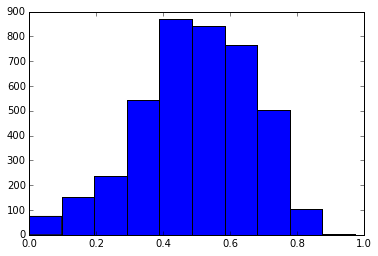

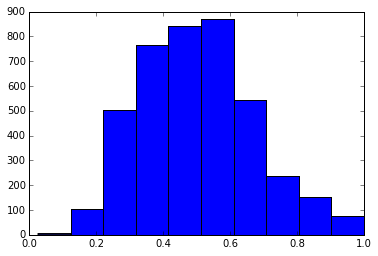

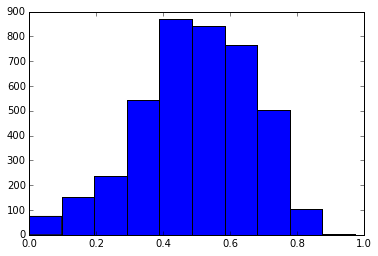

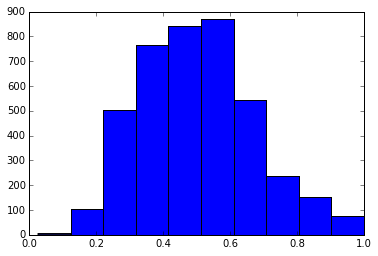

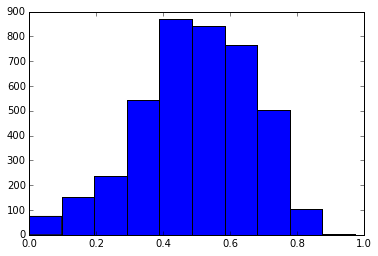

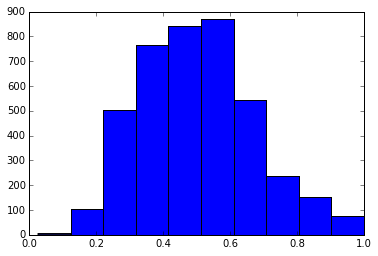

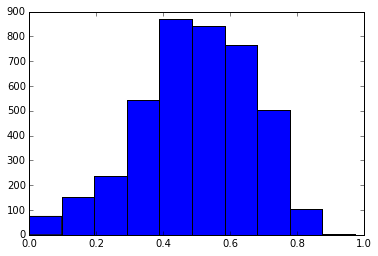

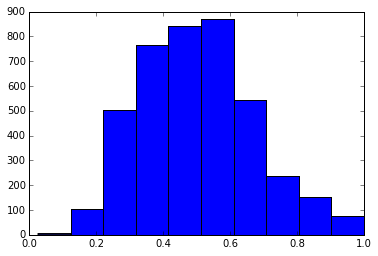

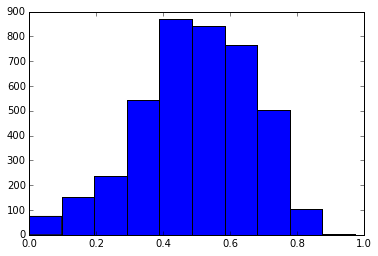

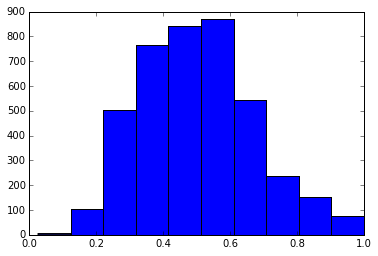

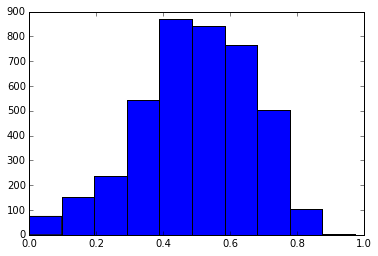

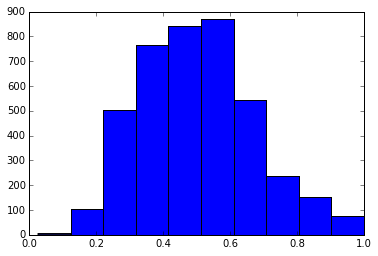

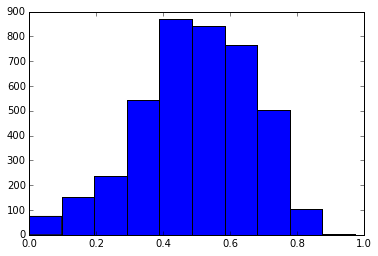

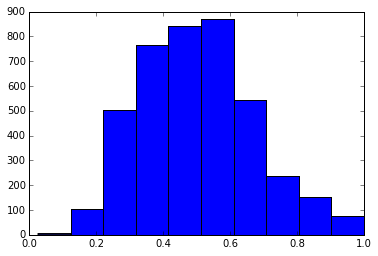

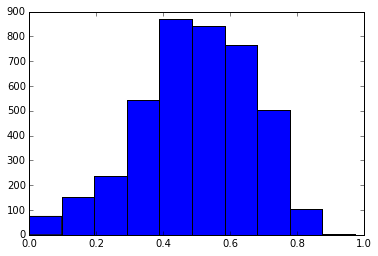

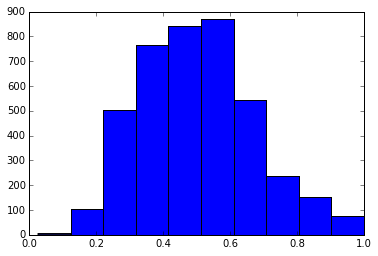

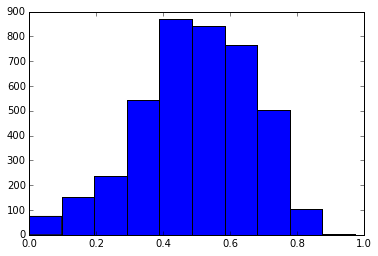

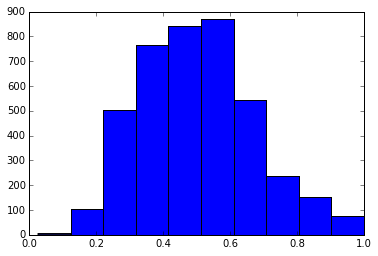

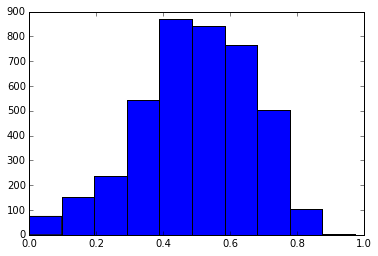

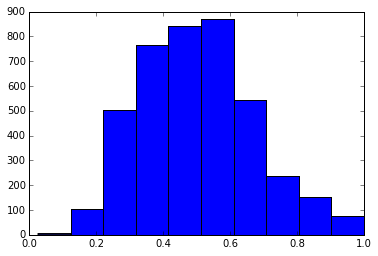

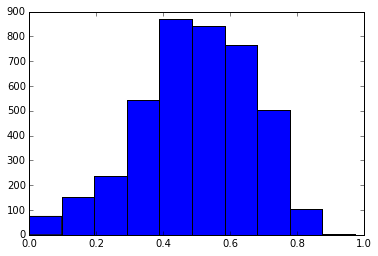

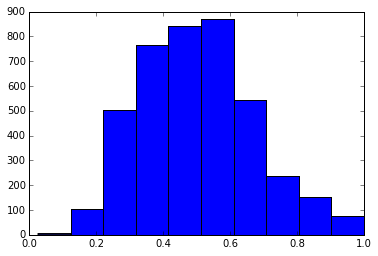

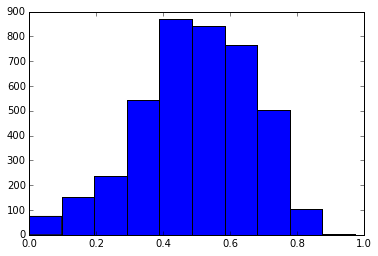

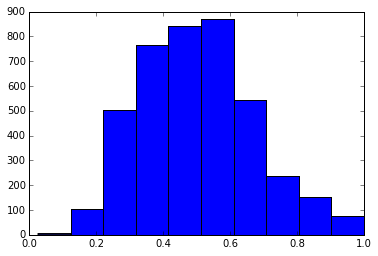

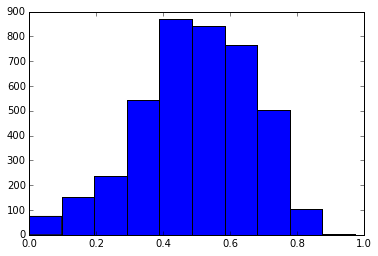

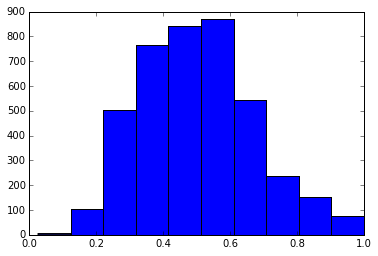

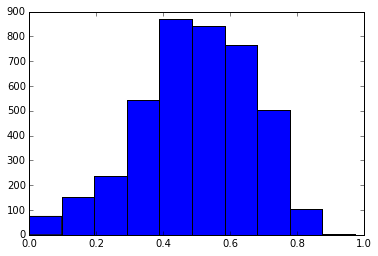

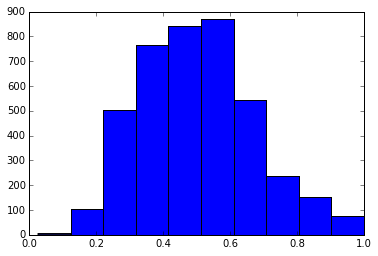

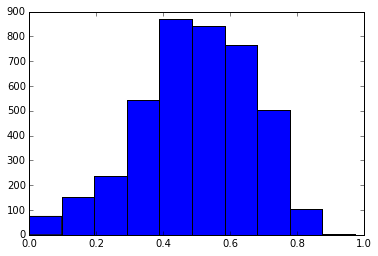

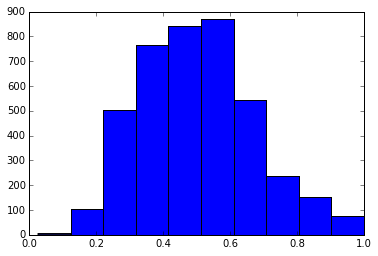

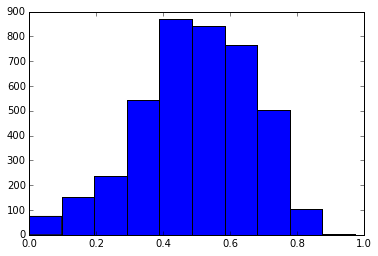

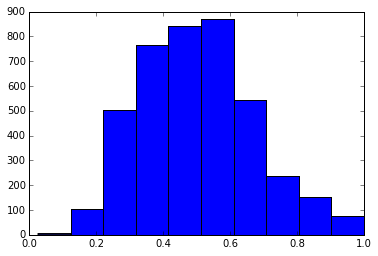

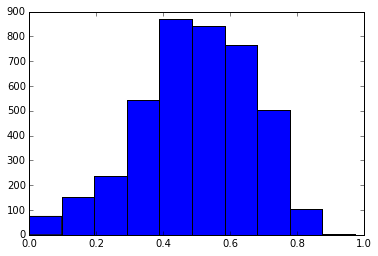

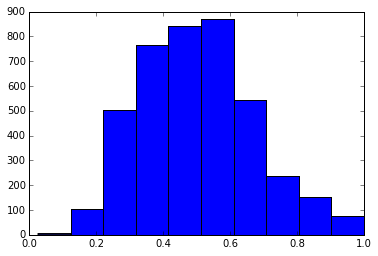

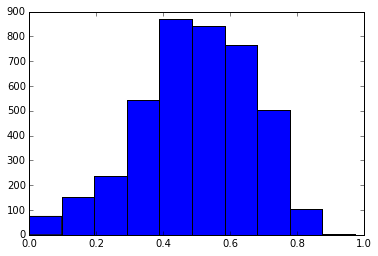

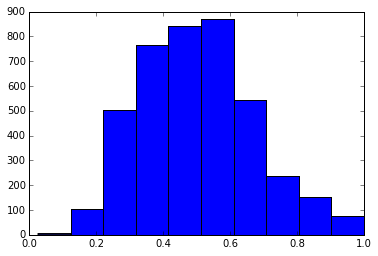

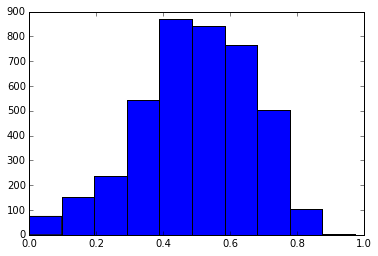

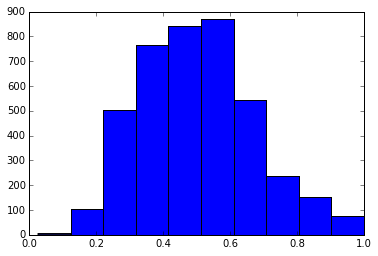

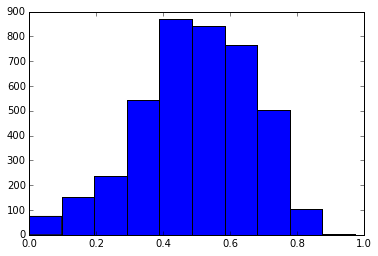

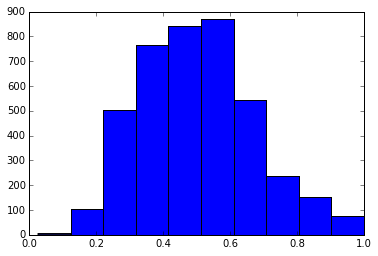

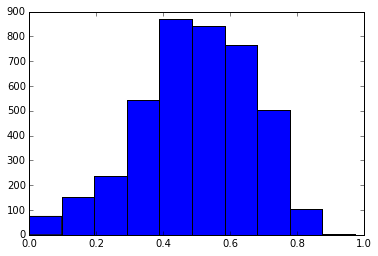

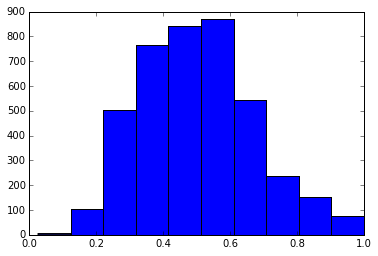

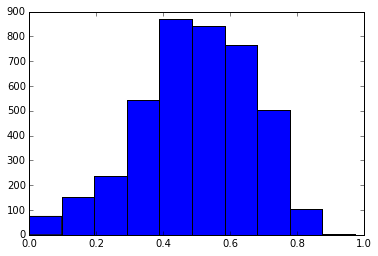

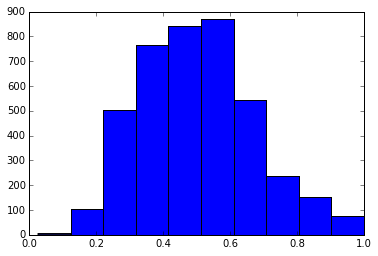

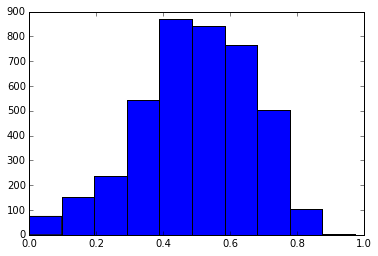

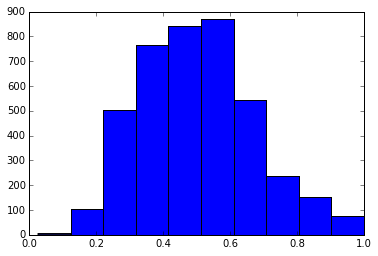

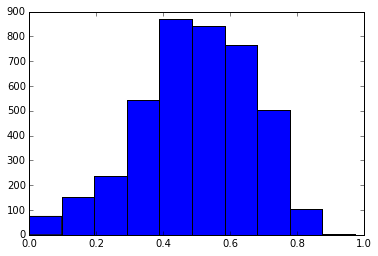

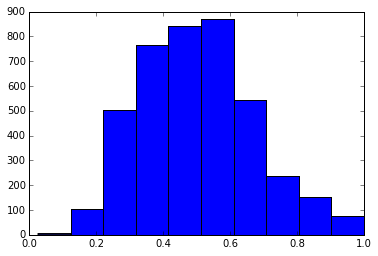

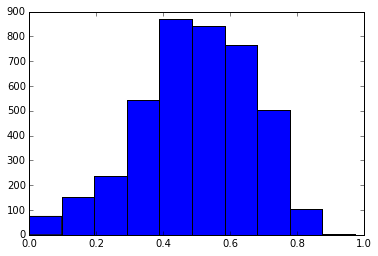

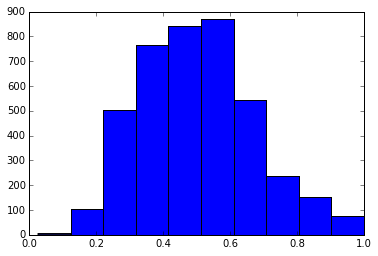

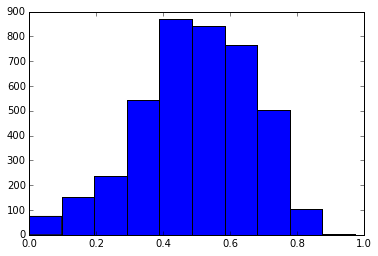

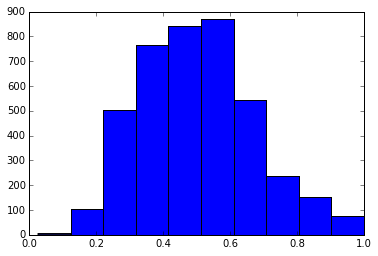

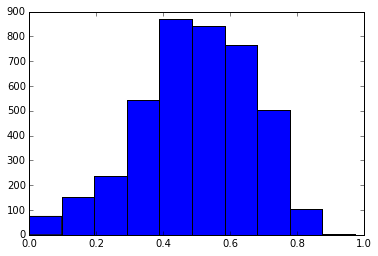

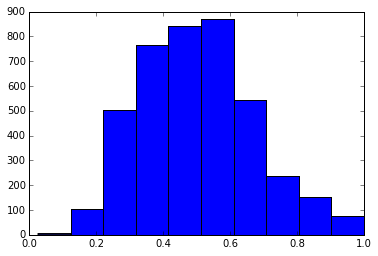

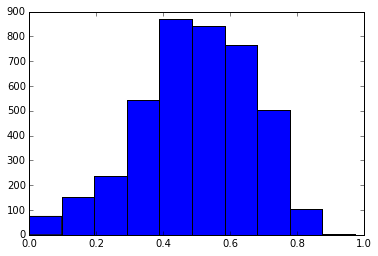

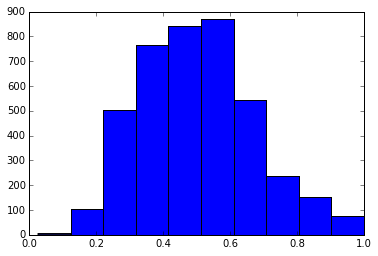

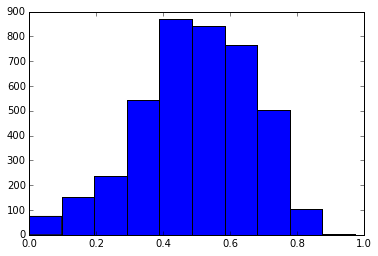

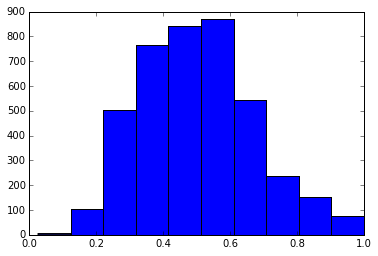

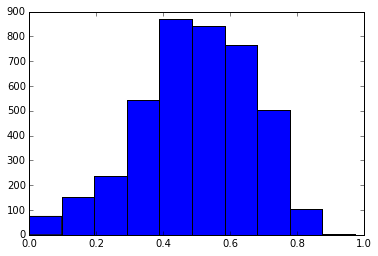

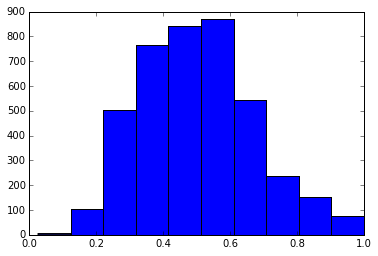

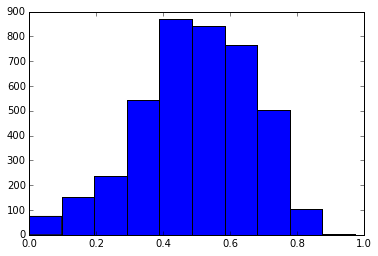

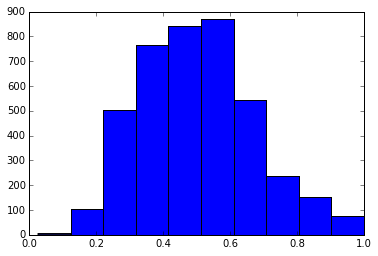

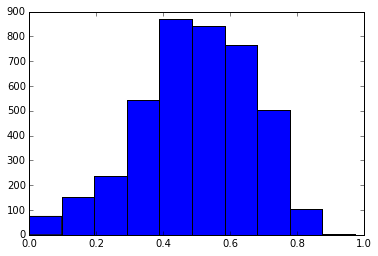

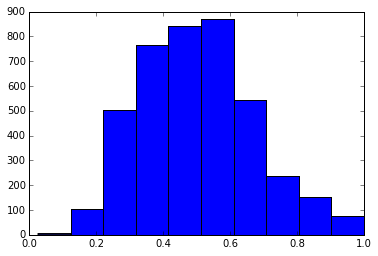

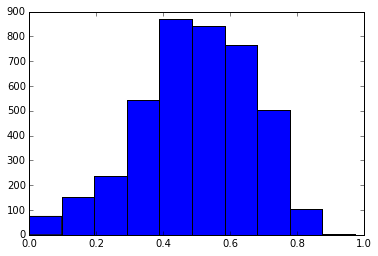

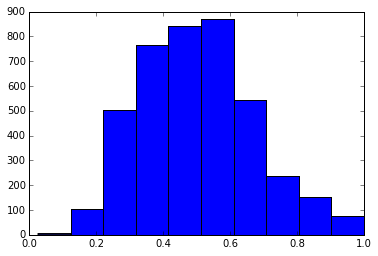

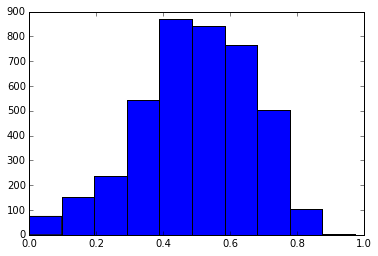

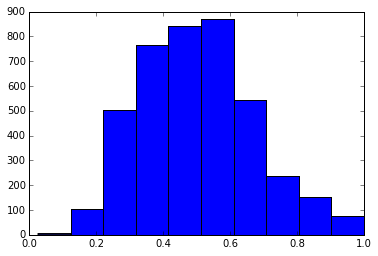

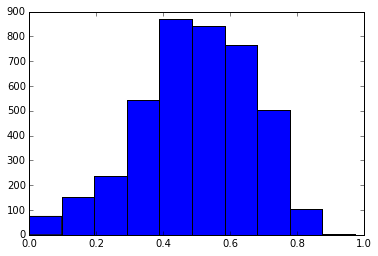

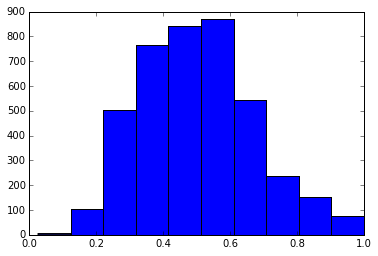

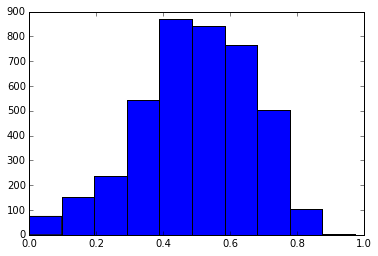

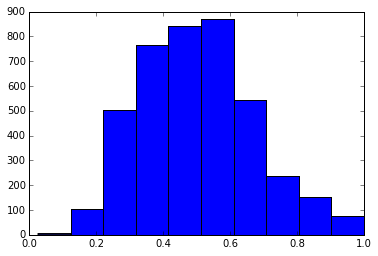

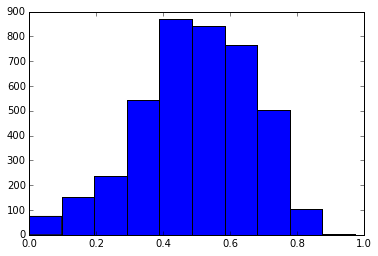

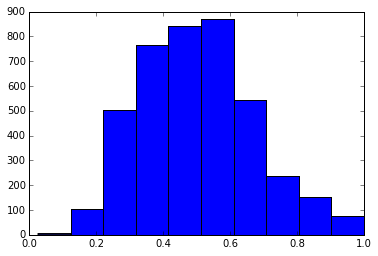

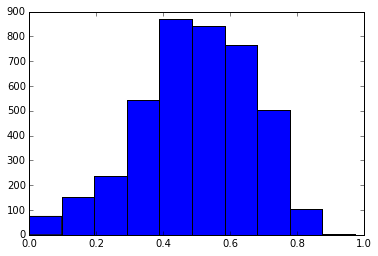

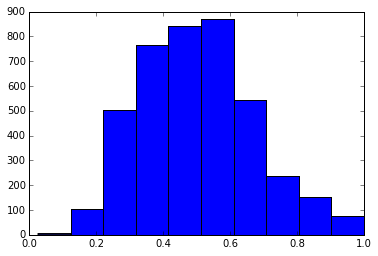

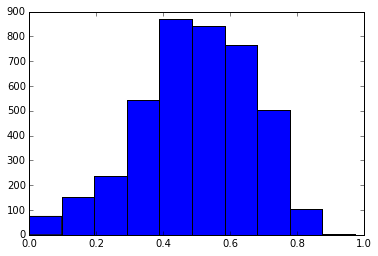

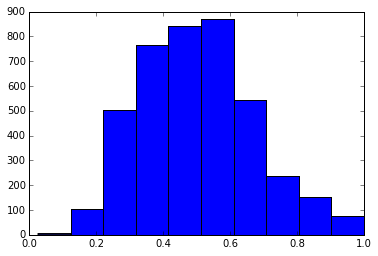

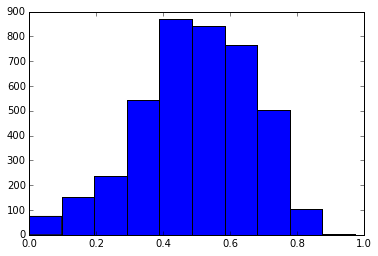

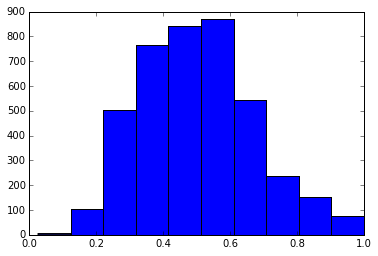

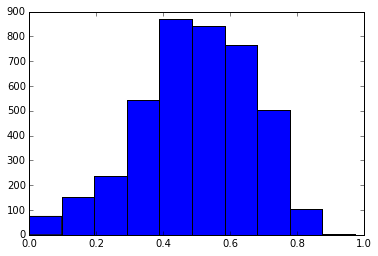

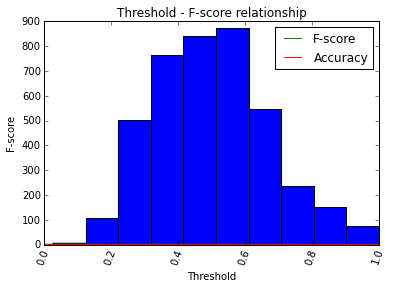

In [53]:
bestT = bestThreshold(np.linspace(0, 1.0, 41), Xtrain, ytrain, Xcv, ycv, C = 2)
print '\nThreshold that maximizes F-score >>', bestT

###2. Add polynomial features
        1) add polynomial features
        2) find optimum polynomial term

In [17]:
# 1) add polynomial features

from sklearn.preprocessing import PolynomialFeatures

def polyFeature(level, X):
    '''
    level: int >=1
    X
    
    returns: X with polynomial features
    '''
    
    poly = PolynomialFeatures(level)
    Xpoly = poly.fit_transform(X)
    
    return Xpoly

In [18]:
# 2) find optimum polynomial term

def bestPoly(listOfNum, Xtrain, ytrain, Xcv, ycv, C = 1, threshold = 0.5):
    '''
        prints Polynomial term - F-score relationship
    returns: int, best polynomial term
    '''
    
    accuracyList = []
    fscoreList = []

    for i in listOfNum:
        print 'Polynomial %d' % i
        
        # 1 add polynomial terms
        XtrainPoly = polyFeature(i, Xtrain)
        XcvPoly = polyFeature(i, Xcv)

        # 2 train
        clf = LogisticRegression(C = C)
        clf.fit(XtrainPoly, ytrain)

        # 3 get measures
        accuracy, precision, recall, fscore = getMeasures(ycv, getPrediction(clf, XcvPoly, threshold))
        
        accuracyList.append(accuracy)
        fscoreList.append(fscore)
    
    # plot relationship
    plt.figure()
    plt.plot(listOfNum, fscoreList, label = 'F-score')
    plt.plot(listOfNum, accuracyList, label = 'Accuracy')

    plt.legend(loc='best')
    plt.xticks(rotation=70) 
    plt.xlabel("Polynomial term")
    plt.ylabel("F-score")
    plt.title("Polynomial term - F-score relationship")
    
    maxFscore = max(fscoreList)
    maxIndex = fscoreList.index(maxFscore)
    
    return listOfNum[maxIndex]

Polynomial 1
[0 1]
[[ 0.34775296  0.65224704]
 [ 0.45598648  0.54401352]
 [ 0.57558007  0.42441993]
 ..., 
 [ 0.49039845  0.50960155]
 [ 0.28261068  0.71738932]
 [ 0.59192476  0.40807524]]
Polynomial 2
[0 1]
[[ 0.47146261  0.52853739]
 [ 0.5881242   0.4118758 ]
 [ 0.65483205  0.34516795]
 ..., 
 [ 0.45662477  0.54337523]
 [ 0.00663498  0.99336502]
 [ 0.68100466  0.31899534]]
Polynomial 3
[0 1]
[[ 0.34725607  0.65274393]
 [ 0.42313872  0.57686128]
 [ 0.48039984  0.51960016]
 ..., 
 [ 0.4855243   0.5144757 ]
 [ 0.45872747  0.54127253]
 [ 0.50967607  0.49032393]]

Polynomial term that maximizes F-score >> 2


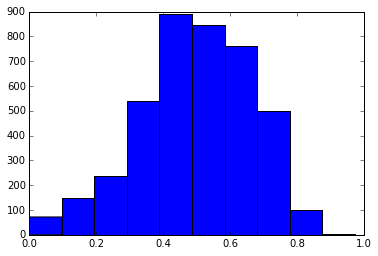

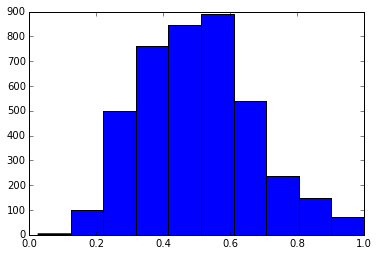

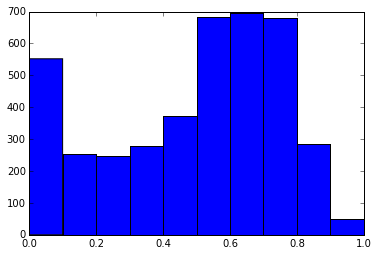

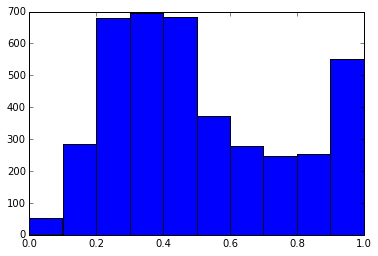

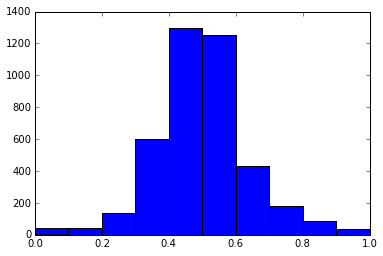

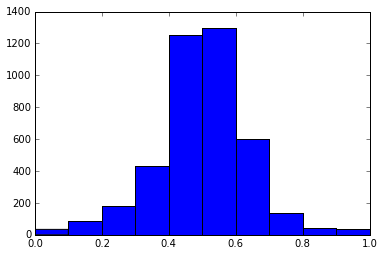

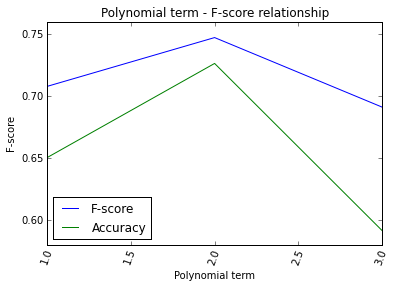

In [54]:
bestP = bestPoly(range(1,4), Xtrain, ytrain, Xcv, ycv, C = 1, threshold = bestT)
print '\nPolynomial term that maximizes F-score >>', bestP

###3. Modify C (regularization term)

In [20]:
# 3. Modify C

def bestC(listOfNum, Xtrain, ytrain, Xcv, ycv, threshold = 0.5):
    accuracyList = []
    fscoreList = []
    
    for i in listOfNum:

        # 1 train
        clf = LogisticRegression(C = i)
        clf.fit(Xtrain, ytrain)

        # 2 get measures
        accuracy, precision, recall, fscore = getMeasures(ycv, \
                                                          getPrediction(clf, Xcv, threshold))
        accuracyList.append(accuracy)
        fscoreList.append(fscore)

        print '\nWhen C = %d, accuracy is %f and f-score is %f.' % (i, accuracy, fscore)
    
    # plot relationship
    plt.figure()
    plt.plot(listOfNum, fscoreList, label = 'F-score')
    plt.plot(listOfNum, accuracyList, label = 'Accuracy')

    plt.legend(loc='best')
    plt.xticks(rotation=70) 
    plt.xlabel("C")
    plt.ylabel("F-score")
    plt.title("C - F-score relationship")

    maxFscore = max(fscoreList)
    maxIndex = fscoreList.index(maxFscore)

    return listOfNum[maxIndex]

[[ 0.47150052  0.52849948]
 [ 0.58834077  0.41165923]
 [ 0.6546756   0.3453244 ]
 ..., 
 [ 0.45637215  0.54362785]
 [ 0.00662264  0.99337736]
 [ 0.68098884  0.31901116]]

When C = 1, accuracy is 0.726696 and f-score is 0.747520.
[[ 0.47855925  0.52144075]
 [ 0.59291999  0.40708001]
 [ 0.65855102  0.34144898]
 ..., 
 [ 0.45324294  0.54675706]
 [ 0.00465191  0.99534809]
 [ 0.68764365  0.31235635]]

When C = 2, accuracy is 0.728160 and f-score is 0.746818.
[[ 0.48193326  0.51806674]
 [ 0.59918152  0.40081848]
 [ 0.66158622  0.33841378]
 ..., 
 [ 0.45271796  0.54728204]
 [ 0.0039011   0.9960989 ]
 [ 0.69080458  0.30919542]]

When C = 3, accuracy is 0.730600 and f-score is 0.747945.
[[ 0.4802956   0.5197044 ]
 [ 0.57996193  0.42003807]
 [ 0.65539451  0.34460549]
 ..., 
 [ 0.4560873   0.5439127 ]
 [ 0.00397407  0.99602593]
 [ 0.6886339   0.3113661 ]]

When C = 4, accuracy is 0.729624 and f-score is 0.748639.
[[ 0.48515093  0.51484907]
 [ 0.61156794  0.38843206]
 [ 0.66648722  0.33351278]
 ..

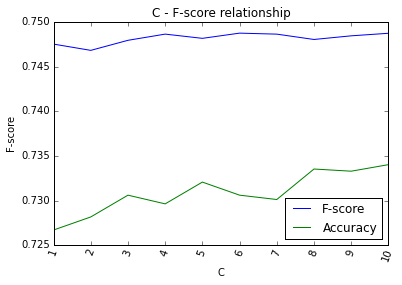

In [42]:
XtrainPoly = polyFeature(bestP, Xtrain)
XcvPoly = polyFeature(bestP, Xcv)

bestc = bestC(np.linspace(1, 10, 10), XtrainPoly, ytrain, XcvPoly, ycv, threshold = bestT)
print '\nC that maximizes F-score >>', bestc

### 4. Modified Model
    Train again with modified parameters
    (Higher f-score expected, in sacrifice of accuracy)
    1. Modified Threshold: 0.125
    2. Modified Polynomial Term: 2
    3. Modified C: 3

[0 1]
[[ 0.00182477  0.99817523]
 [ 0.39472571  0.60527429]
 [ 0.28554741  0.71445259]
 ..., 
 [ 0.13708495  0.86291505]
 [ 0.14573466  0.85426534]
 [ 0.33948886  0.66051114]]

accuracy 0.0691666666667
precision 0.0658022581834
recall 0.979062811565
fscore 0.123316485103


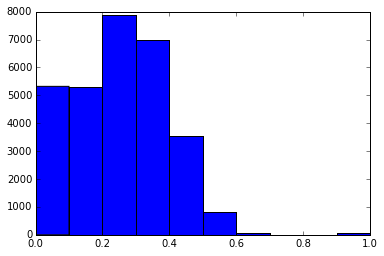

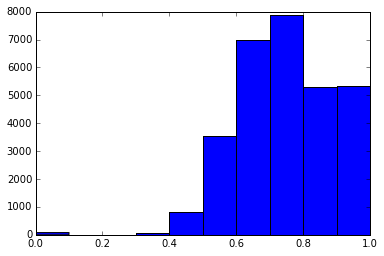

In [55]:
# 1. Modified Threshold: 0.125
bestT

# 2. Modified polynomial term: 2
XtrainPoly = polyFeature(bestP, Xtrain)
XtestPoly = polyFeature(bestP, Xtest)

# 3. Modified C: 3
bestc

# Modified Model
    # Train
bestClf = LogisticRegression(C = bestc)
bestClf.fit(XtrainPoly, ytrain)

    # Predict
bestPrediction = predict(bestClf, XtestPoly, ytest, threshold = bestT)

In [44]:
bestClf.classes_

array([0, 1])

(array([  8.00000000e+01,   4.00000000e+00,   8.00000000e+00,
          6.40000000e+01,   8.47000000e+02,   3.58900000e+03,
          7.02800000e+03,   7.82900000e+03,   5.22700000e+03,
          5.32400000e+03]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

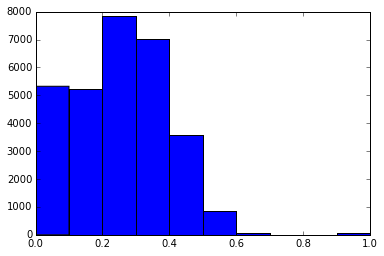

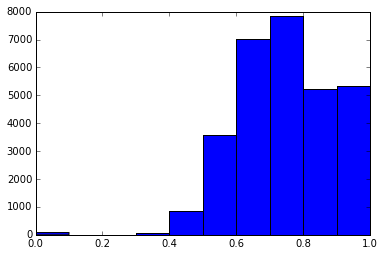

In [50]:
proba = bestClf.predict_proba(XtestPoly)
plt.figure()
plt.hist(proba[:,0])
plt.figure()
plt.hist(proba[:,1])
